In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, MaxNLocator
from matplotlib.scale import LogScale
import glob
from collections import defaultdict
%matplotlib notebook

In [2]:
map_max_steps = {
    "rooms": 12801,
    "warehouse": 12801,
    "empty": 12801,
    "den520d": 31300
}

la_colors = {
    "plrtalearning": "purple",
    "dijkstralearning": "red",
    "nolearning": "black"
}

dm_colors = {
    0: "green",
    1: "black",
    2: "blue"
}

def long_uw(uw, ni):
    if uw == "NA":
        return "Safe Interval Wait-" + str(ni)
    else:
        return "Unit Wait (" + str(uw) + ")"
    
long_dm = {
    0: "<x,y,t>",
    1: "<x,y,i>-int",
    2: "<x,y,i>-subinterval"
}

colors = ["green", "red", "blue", "grey"]
labels = ["survived", "died", "timed out", "stepped out"]

plot_folder = "results_plots/"

In [3]:
data = pd.read_csv("data_feb23_rooms_more.csv", index_col = 0, na_values=[],keep_default_na = False)
ref_dat = pd.read_csv("data_reference.csv", index_col = 0, na_values=[],keep_default_na = False)
reference = defaultdict(dict)
for i in ref_dat.index:
    reference[ref_dat.loc[i, "map"]][ref_dat.loc[i, "task"]] = ref_dat.loc[i, "solution duration"]

In [4]:
data["optimal duration"] = 0.0
for i in data.index:
    data.loc[i, "optimal duration"] = reference[data.loc[i, "map"]][data.loc[i, "task"]]

In [5]:
ind = data.loc[data["solution duration"] != "na", "solution duration"].astype(float)/data.loc[data["solution duration"] != "na", "optimal duration"] < 1.0

In [6]:
data.loc[data["solution duration"] != "na"].loc[ind].sort_values("task")

,map,task,expansion algorithm,learning algorithm,decision algorithm,lookahead,dynmode,unitWait,numIntervals,agentFate,solution duration,steps,totalExpansions,user time expansion,user time learning,user time decision,user time safe interval generation,optimal duration
15240,rooms,13,astar,nolearning,miniminbackup,1024,2,NA,3,survived,69.168678,50,14395,0.0,0.0,0.0,0.0,69.294197
30751,rooms,13,astar,nolearning,miniminbackup,256,1,NA,1,survived,69.168678,60,8018,0.0,0.0,0.0,0.0,69.294197
87550,rooms,13,astar,nolearning,miniminbackup,64,0,NA,1,survived,69.196823,60,3080,0.0,0.0,0.0,0.0,69.294197
86544,rooms,13,astar,nolearning,miniminbackup,512,2,NA,3,survived,69.168678,55,11246,0.0,0.0,0.0,0.0,69.294197
45559,rooms,13,astar,nolearning,miniminbackup,1024,0,NA,3,survived,69.168678,50,14401,0.0,0.0,0.0,0.0,69.294197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25623,rooms,488,astar,nolearning,miniminbackup,1024,0,NA,3,survived,71.316406,56,16474,0.0,0.0,0.0,0.0,77.261986
7433,rooms,488,astar,nolearning,miniminbackup,1024,1,NA,3,survived,71.316406,56,16474,0.0,0.0,0.0,0.0,77.261986
57614,rooms,488,astar,plrtalearning,miniminbackup,1024,2,NA,3,survived,71.643318,57,15797,0.0,0.0,0.0,0.0,77.261986
76730,rooms,490,astar,dijkstralearning,miniminbackup,1024,1,NA,3,survived,83.757553,67,34249,0.0,0.0,0.0,0.0,83.817078


In [7]:
data.loc[data["solution duration"] != "na"].loc[ind].sort_values("steps")

,map,task,expansion algorithm,learning algorithm,decision algorithm,lookahead,dynmode,unitWait,numIntervals,agentFate,solution duration,steps,totalExpansions,user time expansion,user time learning,user time decision,user time safe interval generation,optimal duration
63451,rooms,213,astar,dijkstralearning,miniminbackup,512,0,NA,3,survived,55.956524,40,3818,0.0,0.0,0.0,0.0,55.982388
38503,rooms,213,astar,dijkstralearning,miniminbackup,1024,0,NA,3,survived,55.956524,40,3818,0.0,0.0,0.0,0.0,55.982388
20298,rooms,213,astar,dijkstralearning,miniminbackup,256,0,NA,3,survived,55.948872,40,4680,0.0,0.0,0.0,0.0,55.982388
85389,rooms,213,astar,dijkstralearning,miniminbackup,1024,0,NA,1,survived,55.948872,42,4706,0.0,0.0,0.0,0.0,55.982388
19067,rooms,213,astar,dijkstralearning,miniminbackup,512,0,NA,1,survived,55.948872,42,4706,0.0,0.0,0.0,0.0,55.982388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,rooms,128,astar,nolearning,miniminbackup,512,0,NA,3,survived,140.26399,112,54206,0.0,0.0,0.0,0.0,140.323000
395,rooms,482,astar,plrtalearning,miniminbackup,256,2,NA,1,survived,150.31688,113,27965,0.0,0.0,0.0,0.0,150.388460
46809,rooms,128,astar,plrtalearning,miniminbackup,256,1,NA,1,survived,140.24739,114,28369,0.0,0.0,0.0,0.0,140.323000
2364,rooms,128,astar,dijkstralearning,miniminbackup,512,2,NA,1,survived,140.31935,114,48873,0.0,0.0,0.0,0.0,140.323000


In [5]:
filt = {
 'map': "rooms",
 'expansion algorithm': "astar",
 'learning algorithm': "plrtalearning",
 'decision algorithm': "miniminbackup",
 'dynmode': 1, 
 'unitWait': "NA",
 'numIntervals': 1
}

def filter_data(data, filt):
    dat = data
    for col in filt:
        dat = dat.loc[dat[col] == filt[col]] 
    return dat

def survival_rate(dat):
    total = len(dat)
    
    survived_ind = dat.agentFate == "survived"
    sci = bootstrap_ci(survived_ind)/total
    survived = (survived_ind.sum()/total, sci[0], sci[1])
    
    
    died = dat.agentFate == "died"
    dci = bootstrap_ci(died)/total
    died = (died.sum()/total, dci[0], dci[1])
    
    to = ((dat.agentFate == "timed out") & (dat.steps != dat.map.apply(lambda x: map_max_steps[x])))
    toci = bootstrap_ci(to)/total
    to = (to.sum()/total, toci[0], toci[1])
    
    
    so = ((dat.agentFate == "timed out") & (dat.steps == dat.map.apply(lambda x: map_max_steps[x])))
    soci = bootstrap_ci(so)/total
    so = (so.sum()/total, soci[0], soci[1])
    
    sd = dat.loc[survived_ind]
    
    return survived, died, to, so

#sm.stats.proportion_confint(survived, total, 0.05, "beta")

def bootstrap_ci(dat, n = 2**10):
    return np.percentile(np.sum(np.random.choice(dat.values, (n, len(dat))), axis = 1), (5, 95))

def pre_plot():
    ax = plt.figure()
    plt.xscale(LogScale(ax, base = 2))
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

def post_plot(l = (0, 100)):
    plt.ylabel("Percent survived")
    plt.xlabel("Expansion rate")
    plt.ylim(l)
    plt.legend(loc='lower right')
    plt.savefig(plot_folder + title.replace(" ", "_")+".png", dpi = 600)
    plt.close()

def plot_one(dat, i, c, la):
    lookahead = list(sorted(set(dat.lookahead)))
    res = []
    for l in lookahead:
        ldat = dat.loc[dat.lookahead == l]
        res.append(survival_rate(ldat))
    res = np.asarray(res)
    if c:
        plt.plot(lookahead, 100*res[:, i, 0], c)
        plt.fill_between(lookahead, 100*res[:, i, 1],100*res[:, i, 2],color = c, alpha = 0.45, label =la )
    else:
        plt.plot(lookahead, 100*res[:, i, 0])
        plt.fill_between(lookahead, 100*res[:, i, 1],100*res[:, i, 2], alpha = 0.45, label =la )

In [14]:
ref_dat

,map,task,expansion algorithm,learning algorithm,decision algorithm,lookahead,dynmode,unitWait,numIntervals,agentFate,solution duration,steps,totalExpansions,user time expansion,user time learning,user time decision,user time safe interval generation
0,empty64x64,418,,,,0,,,,survived,60.595161,0,0,0.0,0.0,0.0,0.0
1,rooms,284,,,,0,,,,survived,86.164917,0,0,0.0,0.0,0.0,0.0
2,empty64x64,342,,,,0,,,,survived,46.493965,0,0,0.0,0.0,0.0,0.0
3,warehouse,22,,,,0,,,,survived,42.463589,0,0,0.0,0.0,0.0,0.0
4,empty64x64,476,,,,0,,,,survived,62.301865,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,warehouse,111,,,,0,,,,survived,49.587101,0,0,0.0,0.0,0.0,0.0
1596,empty64x64,256,,,,0,,,,survived,59.312637,0,0,0.0,0.0,0.0,0.0
1597,rooms,98,,,,0,,,,survived,66.137611,0,0,0.0,0.0,0.0,0.0
1598,warehouse,147,,,,0,,,,survived,68.790306,0,0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>


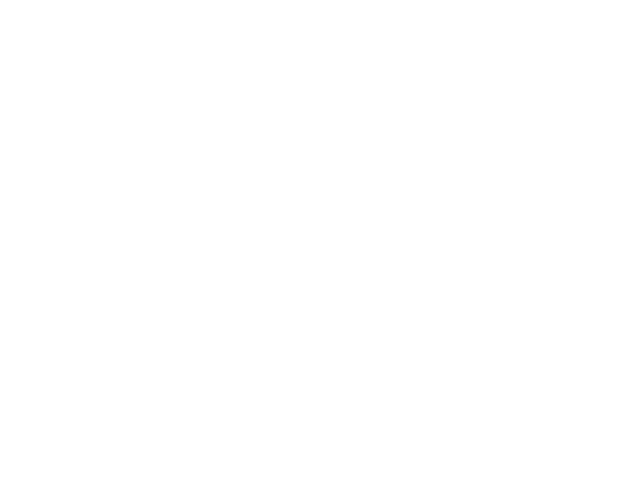

<IPython.core.display.Javascript object>


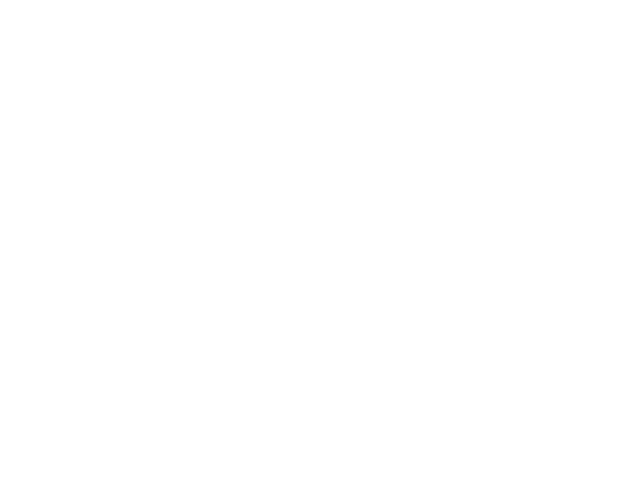

<IPython.core.display.Javascript object>


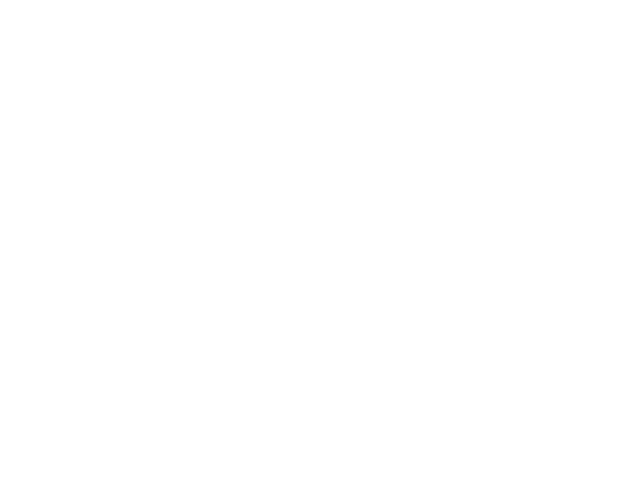

<IPython.core.display.Javascript object>


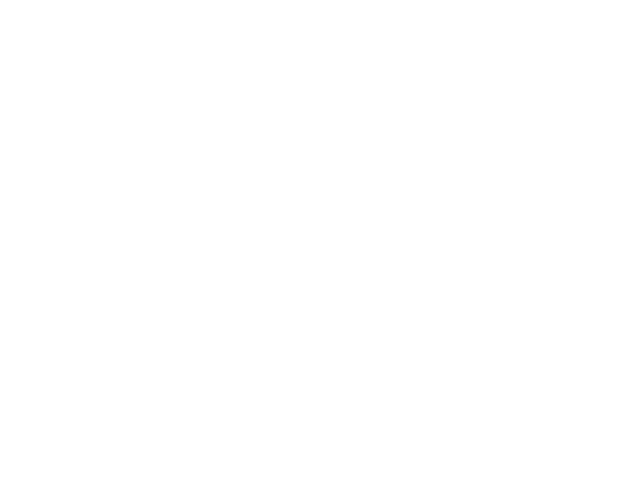

<IPython.core.display.Javascript object>


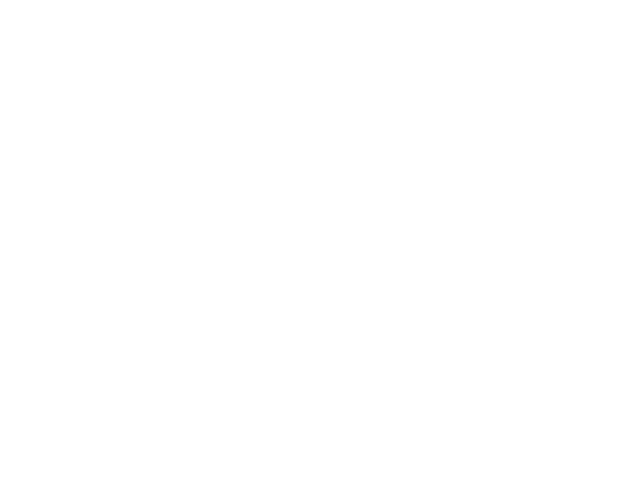

<IPython.core.display.Javascript object>


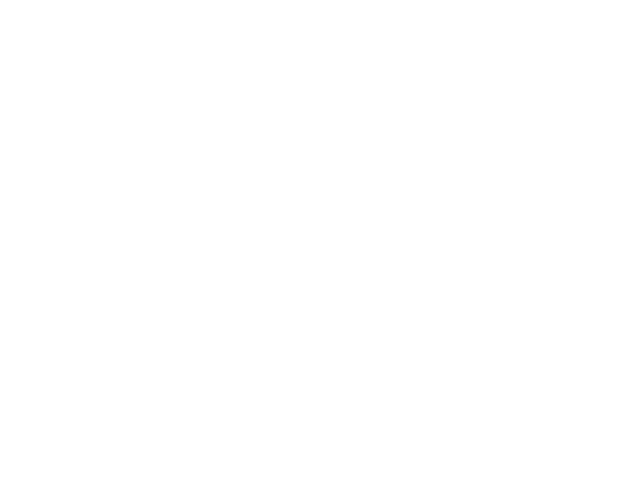

<IPython.core.display.Javascript object>


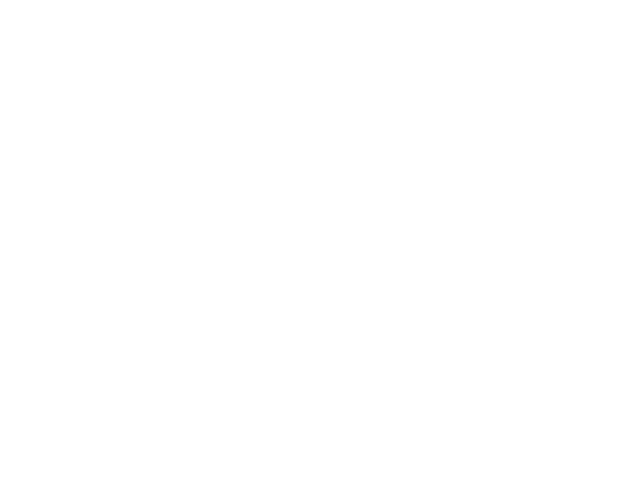

<IPython.core.display.Javascript object>


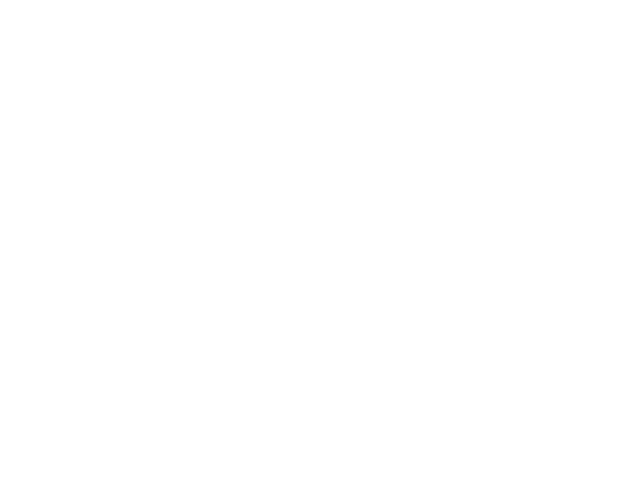

<IPython.core.display.Javascript object>


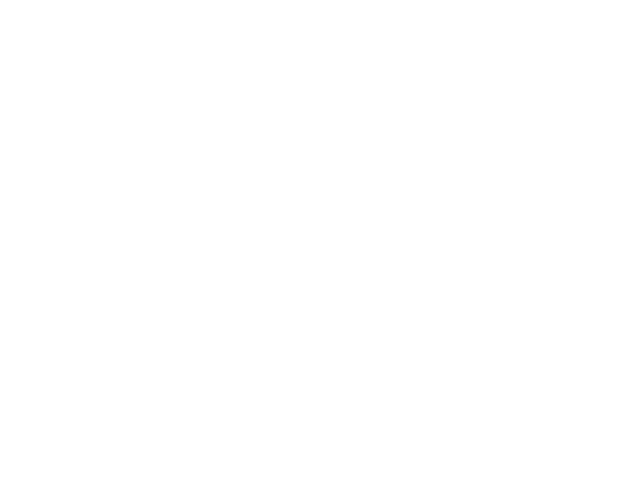

<IPython.core.display.Javascript object>


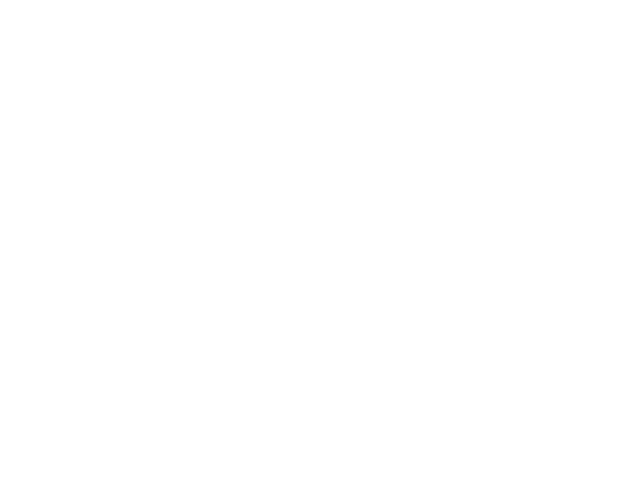

<IPython.core.display.Javascript object>


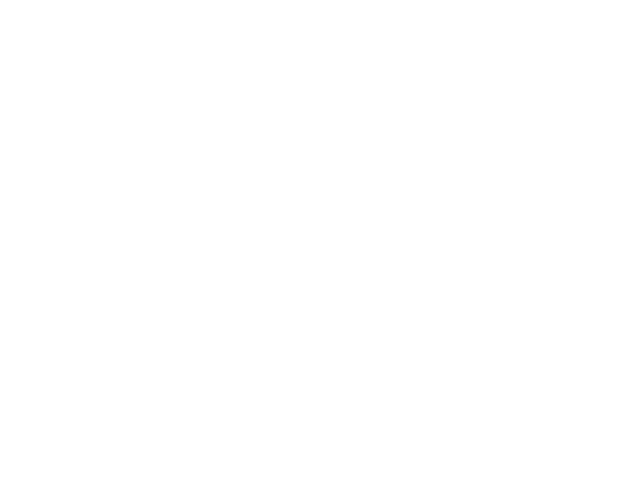

<IPython.core.display.Javascript object>


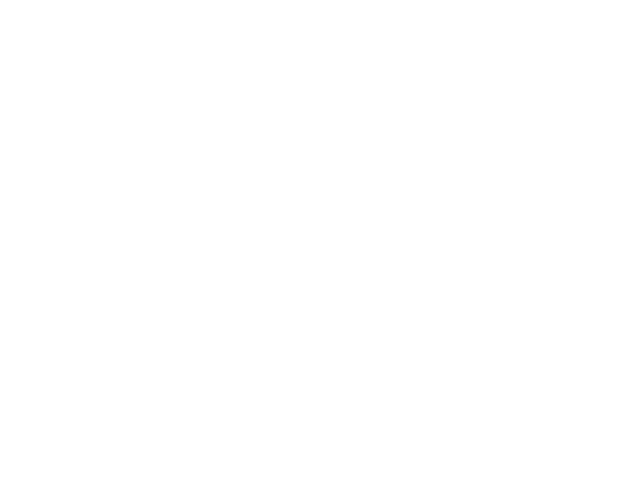

In [8]:
## Look at best learning algorithm for all others
filt = {
 'map': "rooms",
 'expansion algorithm': "astar",
 'decision algorithm': "miniminbackup",
 'dynmode': 1, 
 'unitWait': "NA",
 'numIntervals': 1
}

test = "Learning comparison "

for m in set(data.map):
    filt["map"] = m
    for dm in set(data.dynmode):
        filt["dynmode"] = dm
        uw = "NA"
        filt["unitWait"] = uw
        for ni in set(data.numIntervals):
            filt["numIntervals"] = ni
            dat = filter_data(data, filt)
            if len(dat) > 0:
                pre_plot()
                for la in set(data["learning algorithm"]):
                    d = dat.loc[dat["learning algorithm"] == la]
                    plot_one(d, 0, la_colors[la], la)
                title = test + ", ".join(map(str, (m, long_dm[dm], long_uw(uw, ni))))
                plt.title(test + ", ".join(map(str, (m, long_dm[dm], long_uw(uw, ni)))))
                post_plot()
        for uw in set(data.unitWait) - {"NA"}:
            filt["unitWait"] = uw
            filt["numIntervals"] = 1
            dat = filter_data(data, filt)
            if len(dat) > 0:
                pre_plot()
                for la in set(data["learning algorithm"]):
                    d = dat.loc[dat["learning algorithm"] == la]
                    plot_one(d, 0, la_colors[la], la)
                title = test + ", ".join(map(str, (m, long_dm[dm], long_uw(uw, ni))))
                plt.title(test + ", ".join(map(str, (m, long_dm[dm], long_uw(uw, ni)))))
                post_plot()

<IPython.core.display.Javascript object>


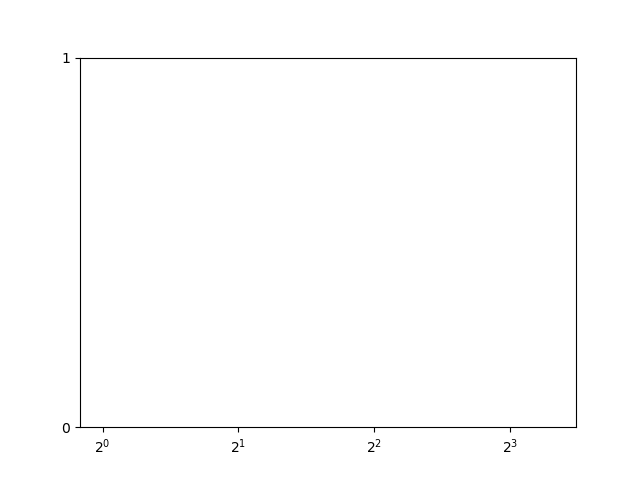

<IPython.core.display.Javascript object>


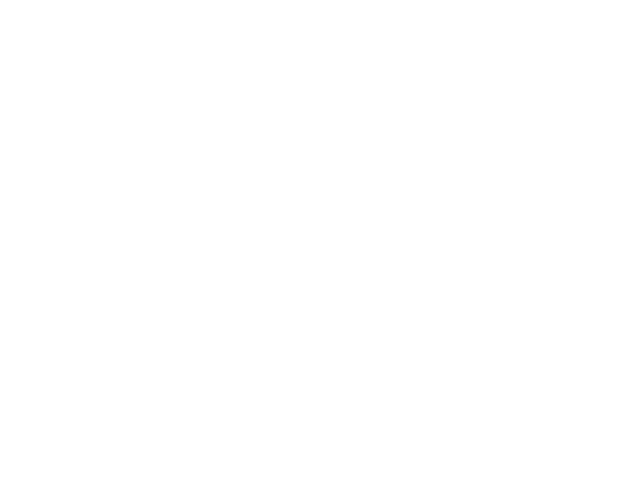

<IPython.core.display.Javascript object>


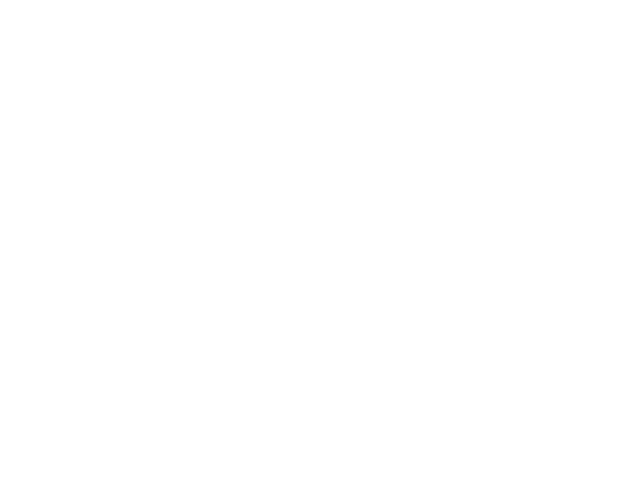

<IPython.core.display.Javascript object>


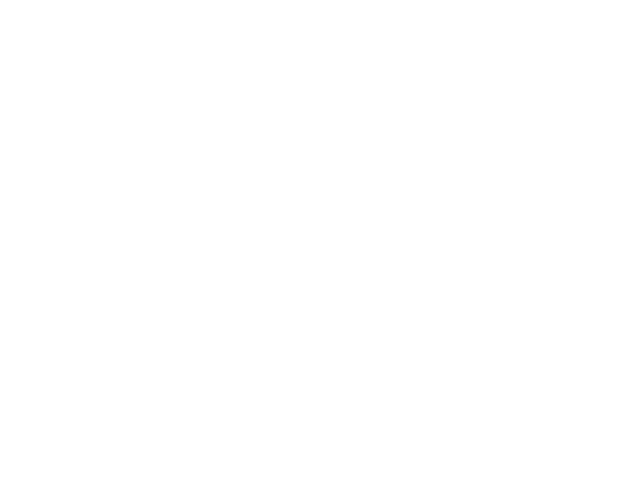

<IPython.core.display.Javascript object>


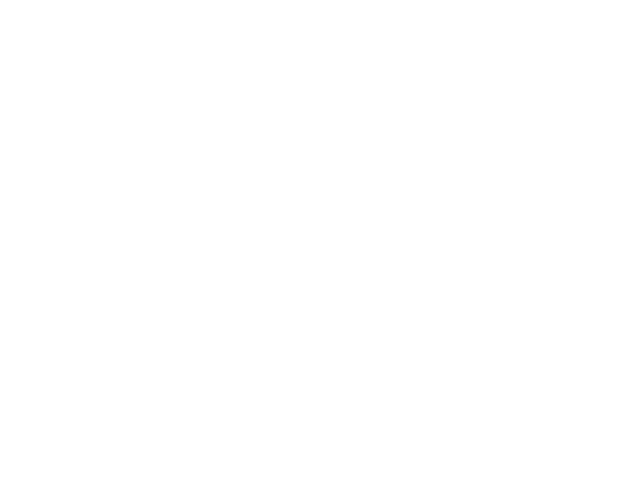

In [11]:
## Look at best learning algorithm and compare the state spaces
filt = {
 'map': "rooms",
 'expansion algorithm': "astar",
 'decision algorithm': "miniminbackup", 
}

best_la = {
    0: "plrtalearning",
    1: "dijkstralearning",
    2: "plrtalearning"
}

test = "State Space Comparison "

for m in set(data.map):
    filt["map"] = m
    pre_plot()
    uw = "NA"
    filt["unitWait"] = uw
    pre_plot()
    for ni in set(data.numIntervals):
        filt["numIntervals"] = ni
        dat = filter_data(data, filt)
        if len(dat) > 0:
            for dm in set(data.dynmode):
                d = dat.loc[(dat["learning algorithm"] == best_la[dm]) & (dat.dynmode == dm)]
                if len(d) > 0:
                    plot_one(d, 0, None, ", ".join(map(str, (best_la[dm], long_dm[dm], long_uw(uw, ni)))))
    title = test + " " + m + " " + long_uw(uw, ni)
    plt.title(title)
    post_plot(l = (70, 100))
    for uw in set(data.unitWait) - {"NA"}:
        filt["unitWait"] = uw
        filt["numIntervals"] = 1
        dat = filter_data(data, filt)
        if len(dat) > 0:
            pre_plot()
            for dm in set(data.dynmode):
                d = dat.loc[(dat["learning algorithm"] == best_la[dm]) & (dat.dynmode == dm)]
                if len(d) > 0:
                    plot_one(d, 0, dm_colors[dm], ", ".join(map(str, (best_la[dm], long_dm[dm], long_uw(uw, ni)))))
            title = test + " " + m + " " + long_uw(uw, ni)
            plt.title(title)
            post_plot(l = (70, 100))

<IPython.core.display.Javascript object>


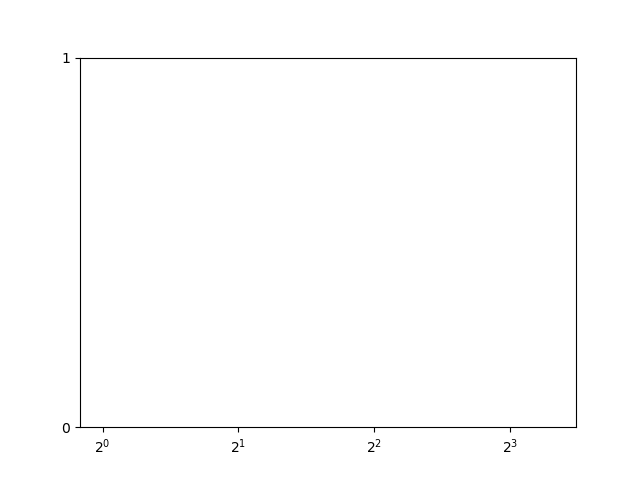

<IPython.core.display.Javascript object>


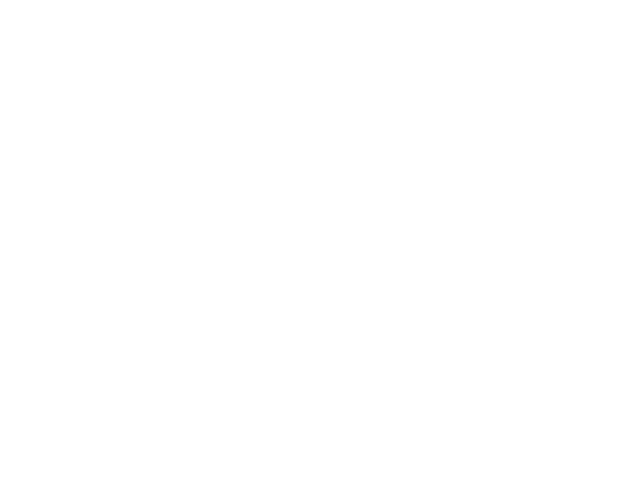

In [12]:
## Look at best learning algorithm and compare the state spaces
filt = {
 'map': "rooms",
 'expansion algorithm': "astar",
 'decision algorithm': "miniminbackup", 
}

best_la = {
    0: "plrtalearning",
    1: "dijkstralearning",
    2: "plrtalearning"
}

test = "State Space Comparison "

for m in set(data.map):
    filt["map"] = m
    pre_plot()
    uw = "NA"
    filt["unitWait"] = uw
    pre_plot()
    for ni in (3,):
        filt["numIntervals"] = ni
        dat = filter_data(data, filt)
        if len(dat) > 0:
            for dm in set(data.dynmode):
                d = dat.loc[(dat["learning algorithm"] == best_la[dm]) & (dat.dynmode == dm)]
                if len(d) > 0:
                    plot_one(d, 0, None, ", ".join(map(str, (best_la[dm], long_dm[dm], long_uw(uw, ni)))))
    for uw in set(data.unitWait) - {"NA"}:
        filt["unitWait"] = uw
        filt["numIntervals"] = 1
        dat = filter_data(data, filt)
        if len(dat) > 0:
            for dm in (0,):
                d = dat.loc[(dat["learning algorithm"] == best_la[dm]) & (dat.dynmode == dm)]
                plot_one(d, 0, None, ", ".join(map(str, (best_la[dm], long_dm[dm], long_uw(uw, ni)))))
    title = test + " " + m 
    plt.title(title)
    post_plot(l = (70, 100))

In [138]:
res = ['results_plots/Learning_comparison_rooms,_<x,y,t>,_Unit_Wait_(1.0).png',
 'results_plots/Learning_comparison_rooms,_<x,y,t>,_Unit_Wait_(0.1).png',
 'results_plots/Learning_comparison_rooms,_<x,y,i>-int,_Unit_Wait_(0.1).png',
 'results_plots/Learning_comparison_rooms,_<x,y,i>-int,_Unit_Wait_(1.0).png',
 'results_plots/Learning_comparison_rooms,_<x,y,i>-int,_Safe_Interval_Wait-3.png',
 'results_plots/State_Space_Comparison__rooms_Unit_Wait_(1.0).png',
 'results_plots/State_Space_Comparison__rooms_Unit_Wait_(0.1).png',
 'results_plots/State_Space_Comparison__rooms_Safe_Interval_Wait-3.png',
 'results_plots/Learning_comparison_rooms,_<x,y,i>-int,_Safe_Interval_Wait-1.png',
       'results_plots/State_Space_Comparison__rooms.png'
      ]

In [132]:
" ".join(res)

'results_plots/Learning_comparison_rooms,_<x,y,t>,_Unit_Wait_(1.0).png results_plots/Learning_comparison_rooms,_<x,y,t>,_Unit_Wait_(0.1).png results_plots/Learning_comparison_rooms,_<x,y,i>-int,_Unit_Wait_(0.1).png results_plots/Learning_comparison_rooms,_<x,y,i>-int,_Unit_Wait_(1.0).png results_plots/Learning_comparison_rooms,_<x,y,i>-int,_Safe_Interval_Wait-3.png results_plots/State_Space_Comparison__rooms_Unit_Wait_(1.0).png results_plots/State_Space_Comparison__rooms_Unit_Wait_(0.1).png results_plots/State_Space_Comparison__rooms_Safe_Interval_Wait-3.png results_plots/Learning_comparison_rooms,_<x,y,i>-int,_Safe_Interval_Wait-1.png results_plots/State_Space_Comparison__rooms.png'

In [141]:
set(data.map)

{'den520d', 'rooms'}